# Products Analysis

In [7]:
import pandas as pd
from reviews.config import processed_data_dir

prod_df = pd.read_json(processed_data_dir / "meta_digital_cameras.json.gz")

In [8]:
# general information about products dataset
prod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8646 entries, 0 to 8645
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category     8646 non-null   object
 1   description  8646 non-null   object
 2   title        8646 non-null   object
 3   brand        8646 non-null   object
 4   main_cat     8646 non-null   object
 5   date         8646 non-null   object
 6   price        8646 non-null   object
 7   asin         8646 non-null   object
dtypes: object(8)
memory usage: 270.2+ KB


In [9]:
# length of data
len(prod_df)

8646

In [10]:
prod_df.head(10)

,category,description,title,brand,main_cat,date,price,asin
0,"[Electronics, Camera & Photo, Digital Cameras,...","[The compact, lightweight HP Photosmart R707 m...",Photosmart R707 digital camera with HP Instant...,HP,Camera & Photo,"December 13, 2004",,7040034018
1,"[Electronics, Camera & Photo, Digital Cameras,...","[Digital camera 640x480 resolution, 2MB built ...",Agfa ePhoto SMILE 0.2MP Digital Camera,Agfa,Camera & Photo,"January 11, 2001",,B00000JBIA
2,"[Electronics, Camera & Photo, Digital Cameras,...",[Introducing the end of digital photography as...,Minolta Dimage 1500 1.5MP Digital Camera w/ 3x...,Konica-Minolta,Camera & Photo,"September 4, 1973",,B00000JBI6
3,"[Electronics, Camera & Photo, Digital Cameras,...","[Wide range of features, 5 resolutions 1440x10...",Agfa CL30 1MP Digital Camera,Agfa,Camera & Photo,"September 4, 1999",,B00000JBIO
4,"[Electronics, Camera & Photo, Digital Cameras,...",[Professional quality digital camera. Resolut...,Agfa 1680 1.2MP Digital Camera w/ 3x Optical ...,Pavlysh,Camera & Photo,"September 4, 1973",,B00000JBIJ
5,"[Electronics, Camera & Photo, Digital Cameras,...",[this product is well built . has many options...,Agfa ePhoto 1280 Digital Camera,Agfa,Camera & Photo,"September 4, 1973",$69.95,B00000JBN1
6,"[Electronics, Camera & Photo, Digital Cameras]",[],Agfa ePhoto 780 Digital Camara,Agfa,Camera & Photo,"December 25, 2006",,B00000JD4Z
7,"[Electronics, Camera & Photo, Digital Cameras,...",[Boosts productivity while improving your imag...,Kodak DC240 1.2MP Digital Camera w/ 3x Optical...,Kodak,Camera & Photo,"September 4, 1999",,B00000JDEL
8,"[Electronics, Camera & Photo, Digital Cameras,...",[Performance meets point-and-shoot. The DC210 ...,Kodak DC210 Plus Digital Camera,Kodak,Camera & Photo,"September 4, 1999",,B00000JDEM
9,"[Electronics, Camera & Photo, Digital Cameras,...",[Kodak Digital Science DC260 Zoom Camera with ...,Kodak DC260 1.6 MP Digital Camera with 3xOptic...,Kodak,Camera & Photo,"September 4, 1999",,B00000JDEE


In [11]:
# remove possible html tags
from reviews.preprocess import strip_html
for attr in prod_df.columns:
    prod_df[attr] = prod_df[attr].astype("string").apply(strip_html)

In [12]:
# transform category and description from list of string to string
prod_df["category"] = prod_df["category"].transform(lambda x: ' '.join(x)).astype("string")
prod_df["description"] = prod_df["description"].transform(lambda x: ' '.join(x)).astype("string")

# convert price to float
# remove invalid prices (html broken)
# set to zero all invalid prices
prod_df["price"].loc[prod_df["price"].astype("string").str.len() > 20] = '-1'
prod_df["price"].loc[prod_df["price"].astype("string").str.len() == 0] = '-1'
prod_df["price"] = prod_df["price"].astype("string").str.replace('$', '').str.replace(',', '').astype("float")

# transform to string
prod_df["title"] = prod_df["title"].astype("string")
prod_df["date"] = prod_df["date"].astype("string")
prod_df["asin"] = prod_df["asin"].astype("string")

# transform to category
prod_df["category"] = prod_df["category"].astype("category")
prod_df["brand"] = prod_df["brand"].astype("category")
prod_df["main_cat"] = prod_df["main_cat"].astype("category")

c:\Users\mirco\AppData\Local\Programs\Python\Python37-32\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\Users\mirco\AppData\Local\Programs\Python\Python37-32\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\Users\mirco\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character r

In [13]:
# remove duplicates
prod_df.drop_duplicates(inplace=True)

In [14]:
# count empty attributes

empty_category = prod_df.loc[prod_df["category"] == '']
empty_brand = prod_df.loc[prod_df["brand"] == '']
empty_main_cat = prod_df.loc[prod_df["main_cat"] == '']

empty_description = prod_df.loc[prod_df["description"].str.len() == 0]
empty_title = prod_df.loc[prod_df["title"].str.len() == 0]
empty_date = prod_df.loc[prod_df["date"].str.len() == 0]
empty_price = prod_df.loc[prod_df["price"] == -1]
empty_asin = prod_df.loc[prod_df["asin"].str.len() == 0]

counts_empty_fields = [
    len(empty_category),
    len(empty_description),
    len(empty_title),
    len(empty_brand),
    len(empty_main_cat),
    len(empty_date),
    len(empty_price),
    len(empty_asin)
]

print(dict(zip(list(prod_df.columns), counts_empty_fields)))

{'category': 0, 'description': 0, 'title': 0, 'brand': 7, 'main_cat': 18, 'date': 137, 'price': 6521, 'asin': 0}


In [15]:
# drop price column
prod_df.drop('price', axis=1, inplace=True)

# remove all rows for empty (brand, main_cat, date)
prod_df = prod_df.loc[prod_df["brand"] != '']
prod_df = prod_df.loc[prod_df["main_cat"] != '']
prod_df = prod_df.loc[prod_df["date"] != '']

In [16]:
# count empty attributes
empty_category = prod_df.loc[prod_df["category"] == '']
empty_brand = prod_df.loc[prod_df["brand"] == '']
empty_main_cat = prod_df.loc[prod_df["main_cat"] == '']

empty_description = prod_df.loc[prod_df["description"].str.len() == 0]
empty_title = prod_df.loc[prod_df["title"].str.len() == 0]
empty_date = prod_df.loc[prod_df["date"].str.len() == 0]
empty_asin = prod_df.loc[prod_df["asin"].str.len() == 0]

counts_empty_fields = [
    len(empty_category),
    len(empty_description),
    len(empty_title),
    len(empty_brand),
    len(empty_main_cat),
    len(empty_date),
    len(empty_asin)
]

print(dict(zip(list(prod_df.columns), counts_empty_fields)))

{'category': 0, 'description': 0, 'title': 0, 'brand': 0, 'main_cat': 0, 'date': 0, 'asin': 0}


In [17]:
prod_df.head(20)

,category,description,title,brand,main_cat,date,asin
0,"[ ' E l e c t r o n i c s ' , ' C a m e r a ...","[ ' T h e c o m p a c t , l i g h t w e i ...",Photosmart R707 digital camera with HP Instant...,HP,Camera & Photo,"December 13, 2004",7040034018
1,"[ ' E l e c t r o n i c s ' , ' C a m e r a ...",[ ' D i g i t a l c a m e r a 6 4 0 x 4 8 ...,Agfa ePhoto SMILE 0.2MP Digital Camera,Agfa,Camera & Photo,"January 11, 2001",B00000JBIA
2,"[ ' E l e c t r o n i c s ' , ' C a m e r a ...","[ "" I n t r o d u c i n g t h e e n d o ...",Minolta Dimage 1500 1.5MP Digital Camera w/ 3x...,Konica-Minolta,Camera & Photo,"September 4, 1973",B00000JBI6
3,"[ ' E l e c t r o n i c s ' , ' C a m e r a ...",[ ' W i d e r a n g e o f f e a t u r e ...,Agfa CL30 1MP Digital Camera,Agfa,Camera & Photo,"September 4, 1999",B00000JBIO
4,"[ ' E l e c t r o n i c s ' , ' C a m e r a ...",[ ' P r o f e s s i o n a l q u a l i t y ...,Agfa 1680 1.2MP Digital Camera w/ 3x Optical ...,Pavlysh,Camera & Photo,"September 4, 1973",B00000JBIJ
5,"[ ' E l e c t r o n i c s ' , ' C a m e r a ...",[ ' t h i s p r o d u c t i s w e l l ...,Agfa ePhoto 1280 Digital Camera,Agfa,Camera & Photo,"September 4, 1973",B00000JBN1
6,"[ ' E l e c t r o n i c s ' , ' C a m e r a ...",[ ],Agfa ePhoto 780 Digital Camara,Agfa,Camera & Photo,"December 25, 2006",B00000JD4Z
7,"[ ' E l e c t r o n i c s ' , ' C a m e r a ...",[ ' B o o s t s p r o d u c t i v i t y w ...,Kodak DC240 1.2MP Digital Camera w/ 3x Optical...,Kodak,Camera & Photo,"September 4, 1999",B00000JDEL
8,"[ ' E l e c t r o n i c s ' , ' C a m e r a ...","[ "" P e r f o r m a n c e m e e t s p o i ...",Kodak DC210 Plus Digital Camera,Kodak,Camera & Photo,"September 4, 1999",B00000JDEM
9,"[ ' E l e c t r o n i c s ' , ' C a m e r a ...",[ ' K o d a k D i g i t a l S c i e n c e ...,Kodak DC260 1.6 MP Digital Camera with 3xOptic...,Kodak,Camera & Photo,"September 4, 1999",B00000JDEE


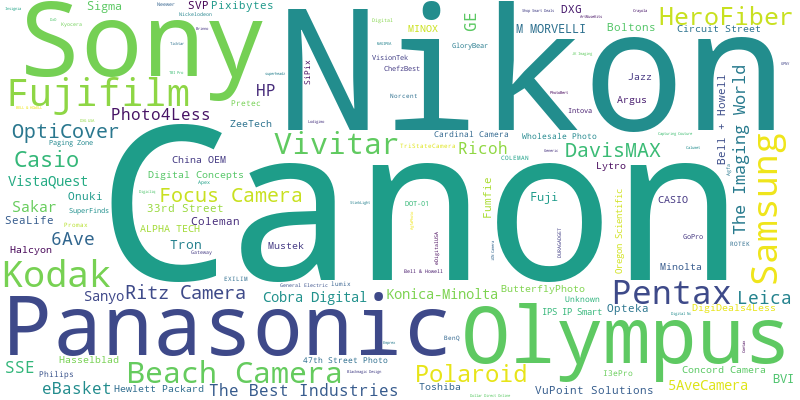

In [18]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

c = Counter(list(prod_df['brand']))
w = WordCloud(width=800, height=400, background_color="white").fit_words(c)
w.to_image()

In [19]:
prod_df['main_cat'].astype('string').value_counts()

Camera & Photo                  8167
All Electronics                  207
Computers                         58
Home Audio & Theater              28
Office Products                   10
Tools & Home Improvement           9
Amazon Home                        4
Musical Instruments                2
Portable Audio & Accessories       2
Automotive                         1
Name: main_cat, dtype: Int64

In [20]:
prod_df['category'].astype('string').value_counts()

[ ' E l e c t r o n i c s ' ,   ' C a m e r a   &   P h o t o ' ,   ' D i g i t a l   C a m e r a s ' ,   ' P o i n t   &   S h o o t   D i g i t a l   C a m e r a s ' ]    4739
[ ' E l e c t r o n i c s ' ,   ' C a m e r a   &   P h o t o ' ,   ' D i g i t a l   C a m e r a s ' ,   ' D S L R   C a m e r a s ' ]                                      2145
[ ' E l e c t r o n i c s ' ,   ' C a m e r a   &   P h o t o ' ,   ' D i g i t a l   C a m e r a s ' ]                                                                      1120
[ ' E l e c t r o n i c s ' ,   ' C a m e r a   &   P h o t o ' ,   ' D i g i t a l   C a m e r a s ' ,   ' M i r r o r l e s s   C a m e r a s ' ]                           484
Name: category, dtype: Int64

In [21]:
# product for years
# convert the 'Date' column to datetime format
prod_df['date']= pd.to_datetime(prod_df['date'])

(prod_df['date'].dt.year).value_counts().sort_index(ascending=False)

2018       8
2017      37
2016     902
2015    1579
2014    1216
2013    1081
2012     663
2011     530
2010     398
2009     298
2008     293
2007     228
2006     265
2005     201
2004     210
2003     184
2002      86
2001     210
2000      32
1999      32
1973      35
Name: date, dtype: int64

In [22]:
# brand for year